In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget -O logo.png "http://51.91.120.89/extras/python-logo.png"

--2022-02-17 08:28:14--  http://51.91.120.89/extras/python-logo.png
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116883 (114K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>] 114.14K   439KB/s    in 0.3s    

2022-02-17 08:28:14 (439 KB/s) - ‘logo.png’ saved [116883/116883]



In [ ]:
# Pillow
im = Image.open("logo.png")
im.convert("L")

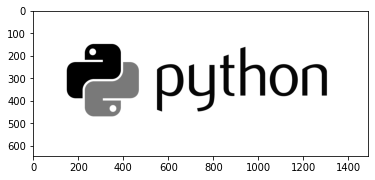

In [12]:
# Numpy
im = mpimg.imread("logo.png")
R, G , B = im[:, :, 0] , im[: , :, 1], im[:, :, 2]
img_gray = R*0.2889 + G*0.587 + B*0.114
#img_gray.shape
plt.imshow(img_gray, cmap='gray')

In [14]:
#!pip install opencv-python
import cv2

In [16]:
im = cv2.imread("logo.png")
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [19]:
cv2.imwrite("l1.png", img_gray)

True

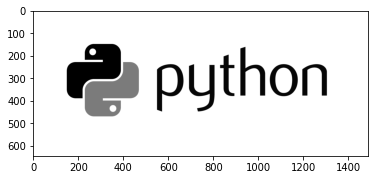

In [21]:
plt.imshow(img_gray, cmap="gray")

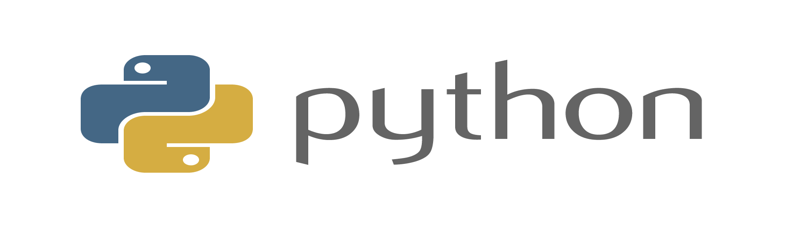

In [22]:
# PIL - resize
im = Image.open("logo.png")
im.resize( (800,237) )

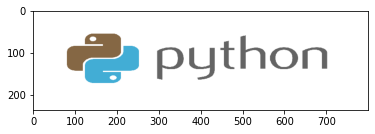

In [24]:
# cv2
im = cv2.imread("logo.png")
im1 = cv2.resize(im, (800,237) , interpolation=cv2.INTER_NEAREST )
plt.imshow(im1)

In [25]:
# przykład z wykorzystanie Scikit-image
!pip install scikit-image -q

In [26]:
from skimage.transform import resize

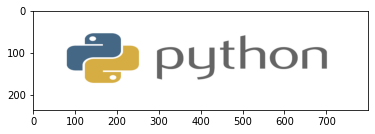

In [28]:
im = plt.imread("logo.png")
im1 = resize(im, (237,800))
plt.imshow(im1)

In [29]:
!wget -O anim.gif "http://51.91.120.89/extras/cnn-anim.gif"

--2022-02-17 09:04:49--  http://51.91.120.89/extras/cnn-anim.gif
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257631 (252K) [image/gif]
Saving to: ‘anim.gif’

anim.gif            100%[===================>] 251.59K   698KB/s    in 0.4s    

2022-02-17 09:04:50 (698 KB/s) - ‘anim.gif’ saved [257631/257631]



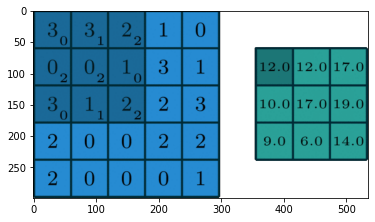

In [32]:
im = Image.open("anim.gif")
im.seek(0)
plt.imshow(im)

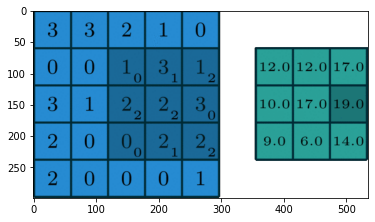

In [36]:
im.seek(5)
plt.imshow(im)

In [38]:
from scipy.signal import convolve2d

def convolve_image(img, kernel):
  img_conv = convolve2d(img, kernel)

  fig = plt.figure(figsize=(12,7))
  chart1 = fig.add_subplot(1, 2, 1)
  chart1.imshow(img, 'gray')

  chart2 = fig.add_subplot(1, 2, 2)
  chart2.imshow(img_conv, 'gray')  

In [39]:
!wget -O cs.jpg "http://51.91.120.89/extras/cs.jpg"

--2022-02-17 09:20:05--  http://51.91.120.89/extras/cs.jpg
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64508 (63K) [image/jpeg]
Saving to: ‘cs.jpg’

cs.jpg              100%[===================>]  63.00K   361KB/s    in 0.2s    

2022-02-17 09:20:06 (361 KB/s) - ‘cs.jpg’ saved [64508/64508]



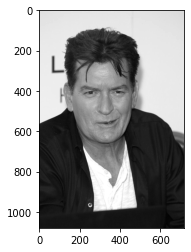

In [42]:
im = mpimg.imread("cs.jpg")
R, G , B = im[:, :, 0] , im[: , :, 1], im[:, :, 2]
img_gray = R*0.2889 + G*0.587 + B*0.114
#img_gray.shape
plt.imshow(img_gray, cmap='gray')


In [ ]:
kernel = np.array([
  [1, 0, -1],
  [2, 0, -2],
  [1, 0, -1]                   
])

convolve_image(img_gray, kernel)

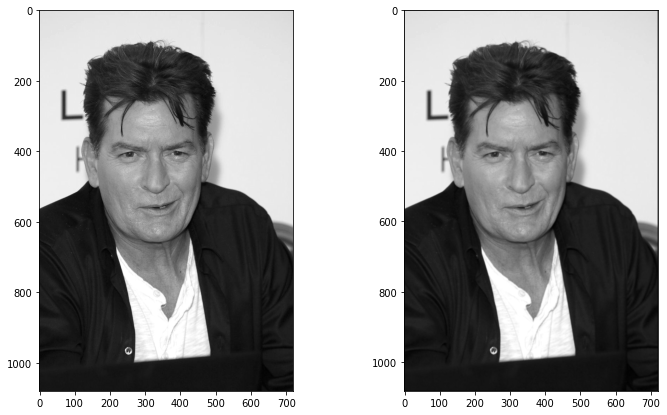

In [44]:
kernel = np.array([
  [0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01]                   
])

convolve_image(img_gray, kernel)

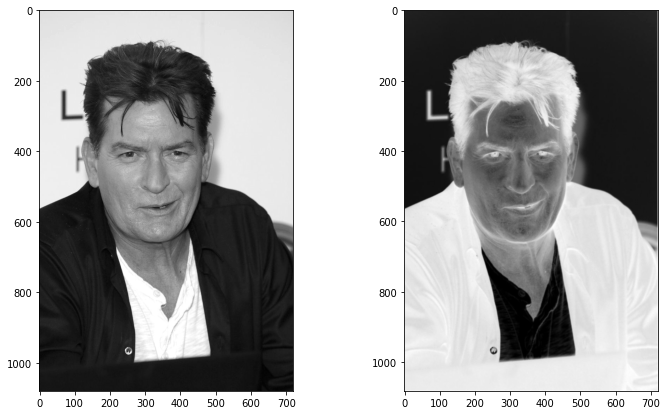

In [45]:
kernel = np.array([
  [-1, -1, -1],
  [-1, -1, -1],
  [-1, -1, -1]                   
])

convolve_image(img_gray, kernel)

In [46]:
# konwolucja przy użyciu klas biblioteki Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [47]:
CS_SIZE = img_gray.shape
CS_SIZE

(1080, 720)

In [49]:
model = Sequential()
model.add(
    Conv2D(filters=1, kernel_size=(3,3), input_shape=(1080, 720, 1) )
)

In [54]:
img_convert = img_gray.reshape(1, 1080, 720, 1)
img_convert.shape

(1, 1080, 720, 1)

In [56]:
result = model.predict(img_convert)
result.shape

(1, 1078, 718, 1)

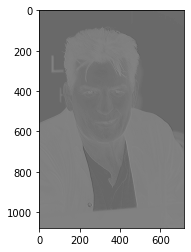

In [58]:
result = result.squeeze()
plt.imshow(result, 'gray')

In [80]:
# własny filtr
from tensorflow.keras import backend

def my_filter(shape, dtype=None):
  filtr = np.array([
     [ [[-1]], [[-1]], [[-1]] ],                         
     [ [[-1]], [[6]], [[-1]] ],                         
     [ [[-1]], [[-1]], [[-1]] ],                                   
  ])
  return backend.variable(filtr, "float32")

model = Sequential()
model.add(
    Conv2D(filters=1, kernel_size=(3,3), input_shape=(1080, 720, 1), kernel_initializer=my_filter)
)

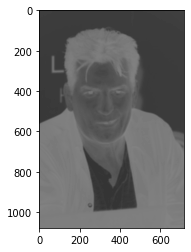

In [81]:
result = model.predict(img_convert)
result = result.squeeze()
plt.imshow(result, 'gray')

In [72]:
def my_filter(shape, dtype=None):
  filtr = np.empty(shape=(7,7,1,1))
  filtr.fill(1/49)
  return backend.variable(filtr, "float32")

model = Sequential()
model.add(
    Conv2D(filters=1, kernel_size=(7,7), input_shape=(1080, 720, 1), kernel_initializer=my_filter)
)

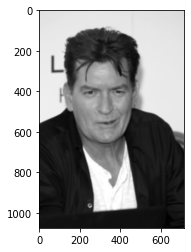

In [73]:
result = model.predict(img_convert)
result = result.squeeze()
plt.imshow(result, 'gray')